In [1]:
import pandas as pd
import numpy as np
import mysql.connector 
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
import pandasql as ps

In [2]:
connection = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="cms2"
)

#client_account table
query = "SELECT * FROM client_account"
df_client= pd.read_sql(query,connection)
df_client

,client_id,acc_type,cd_code,f_name,l_name,nationality,ID,DzongkhagID,tpn,phone,...,bank_id,bank_account,bro_comm_id,address,institution_id,ca_date,title,occupation,bank_account_type,license_no
0,4,J,1000000001,ASTROLOGER INSTITUTE,,BHUTANESE,RI0000001,1308,,,...,1,,37,DECHENCHOLING,1,NaT,,101,Saving Account,None
1,5,J,1000000002,AUTHSO NAMDRELCHHOLING DRATSHANG,,,RI0000002,1308,,,...,1,,37,AUTHSO NAMDRELCHHOLING DRATSHANG LHUNTSE,1,NaT,,101,\r,None
2,6,J,1000000003,BHUTAN TEMPLE BUDHA GAYA,,,RI0000003,1308,,,...,1,,37,DY. SECRETARY COUNCIL FOR ECCLESIATICAL AFFAI...,1,NaT,,101,\r,None
3,7,J,1000000004,BULI GOMDEY,,BHUTANESE,RI0000004,1308,,,...,1,5000044274018,37,C/O. PRINCIPAL BULI GOMDEY CHUMEY BUMTHANG,1,NaT,,101,Saving Account,None
4,8,J,1000000005,CENTRAL MONASTIC BODY,,,RI0000005,1308,,,...,4,110010161270,37,TASHI CHHODZONG THIMPHU : BHUTAN,1,NaT,,101,\r,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106942,111669,J,R123456789,Dendup Pvt Ltd,Tashi Dendup,,II000000001,1308,TBP53868,17963613,...,2,100679702,1,"RSEB, RICB Building, Thimphu, Bhutan",2,2022-05-23 17:36:00,,101,Saving Account,3333333
106943,111670,I,R123456790,PEMA YANGZOM,,BHUTANSES,10601003513,1319,,17369970,...,2,100621571,1,THIMPHU BHUTAN,2,2022-05-24 10:05:04,MISS,25,Saving Account,
106944,111671,I,R202205777,SANGAY CHOPHEL,,BHUTANSES,10906002755,1319,SAP30198,17127478,...,2,100500419,1,THIMPHU BHUTAN,2,2022-05-24 10:18:11,MR,25,Saving Account,
106945,111672,I,B000002242,KEZANG DORJI,,BHUTANESE,10709005530,1308,NA,17300882,...,2,206061313,3,THIMPHU,4,2022-05-24 12:10:20,MR,107,Saving Account,


In [3]:
#bank table
query = "SELECT * FROM banks"
df_bank = pd.read_sql(query,connection)
df_bank.drop(df_bank[df_bank.bank_id == 7].index, inplace = True)
df_bank

,bank_id,bank_name,bank_short_name
0,1,BHUTAN NATIONAL BANK LIMITED,BNBL
1,2,BANK OF BHUTAN LIMITED,BOBL
2,3,BHUTAN DEVELOPMENT BANK LIMITED,BDBL
3,4,DRUK PNB BANK LIMITED,DPNB
4,5,T BANK LIMITED,TBANK


In [4]:
#bank table
query = "SELECT * FROM occupation"
df_occupation = pd.read_sql(query,connection)
df_occupation

,occupation,occupation_name
0,1,SERVICE
1,2,BUSINESSMAN
2,3,BUSINESSMAN/BUSINESSWOMAN
3,4,GOVERNMENT EMPLOYEE
4,5,PRIVATE SECTOR EMPLOYEE
...,...,...
102,104,MONK
103,105,Logistic Officer
104,106,Corporate Employee
105,107,UNEMPLOYED


In [5]:
data = pd.merge(df_client,df_bank)
data

,client_id,acc_type,cd_code,f_name,l_name,nationality,ID,DzongkhagID,tpn,phone,...,bro_comm_id,address,institution_id,ca_date,title,occupation,bank_account_type,license_no,bank_name,bank_short_name
0,4,J,1000000001,ASTROLOGER INSTITUTE,,BHUTANESE,RI0000001,1308,,,...,37,DECHENCHOLING,1,NaT,,101,Saving Account,None,BHUTAN NATIONAL BANK LIMITED,BNBL
1,5,J,1000000002,AUTHSO NAMDRELCHHOLING DRATSHANG,,,RI0000002,1308,,,...,37,AUTHSO NAMDRELCHHOLING DRATSHANG LHUNTSE,1,NaT,,101,\r,None,BHUTAN NATIONAL BANK LIMITED,BNBL
2,6,J,1000000003,BHUTAN TEMPLE BUDHA GAYA,,,RI0000003,1308,,,...,37,DY. SECRETARY COUNCIL FOR ECCLESIATICAL AFFAI...,1,NaT,,101,\r,None,BHUTAN NATIONAL BANK LIMITED,BNBL
3,7,J,1000000004,BULI GOMDEY,,BHUTANESE,RI0000004,1308,,,...,37,C/O. PRINCIPAL BULI GOMDEY CHUMEY BUMTHANG,1,NaT,,101,Saving Account,None,BHUTAN NATIONAL BANK LIMITED,BNBL
4,23,J,1000000020,CHERI DUBDEY NANGMA,,,RI0000006,1308,,,...,37,C/O THE SECRETARY THE CENTRAL MONASTIC BODY ...,1,NaT,,101,\r,None,BHUTAN NATIONAL BANK LIMITED,BNBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106745,110511,I,LO76417657,Lok Bdr Ghalley,None,Bhutanese,11301002764,1308,None,17681997,...,37,,1,2021-09-03 11:05:50,None,101,Saving Account,None,T BANK LIMITED,TBANK
106746,110736,I,TA70677400,Tashi Dorji,None,Bhutanese,11302001706,1308,None,77213028,...,37,,1,2021-09-03 11:05:52,None,101,Saving Account,None,T BANK LIMITED,TBANK
106747,110763,I,TH71277853,Thinley Penjor,None,Bhutanese,11302001712,1308,None,77776306,...,37,,1,2021-09-03 11:05:52,None,101,Saving Account,None,T BANK LIMITED,TBANK
106748,111085,I,LDSB000575,LHACHO,DEMA,BHUTANESE,10607000951,1321,,77125533,...,17,"Babesa, Thimphu",9,2021-11-04 18:16:28,MRS,101,Saving Account,None,T BANK LIMITED,TBANK


In [6]:
#combining f_name and l_name to cust_name
data_test = data
data_test["cust_name"] = data_test['f_name'].astype(str).fillna('') + ' '+ data_test['l_name'].fillna('')
data_test

,client_id,acc_type,cd_code,f_name,l_name,nationality,ID,DzongkhagID,tpn,phone,...,address,institution_id,ca_date,title,occupation,bank_account_type,license_no,bank_name,bank_short_name,cust_name
0,4,J,1000000001,ASTROLOGER INSTITUTE,,BHUTANESE,RI0000001,1308,,,...,DECHENCHOLING,1,NaT,,101,Saving Account,None,BHUTAN NATIONAL BANK LIMITED,BNBL,ASTROLOGER INSTITUTE
1,5,J,1000000002,AUTHSO NAMDRELCHHOLING DRATSHANG,,,RI0000002,1308,,,...,AUTHSO NAMDRELCHHOLING DRATSHANG LHUNTSE,1,NaT,,101,\r,None,BHUTAN NATIONAL BANK LIMITED,BNBL,AUTHSO NAMDRELCHHOLING DRATSHANG
2,6,J,1000000003,BHUTAN TEMPLE BUDHA GAYA,,,RI0000003,1308,,,...,DY. SECRETARY COUNCIL FOR ECCLESIATICAL AFFAI...,1,NaT,,101,\r,None,BHUTAN NATIONAL BANK LIMITED,BNBL,BHUTAN TEMPLE BUDHA GAYA
3,7,J,1000000004,BULI GOMDEY,,BHUTANESE,RI0000004,1308,,,...,C/O. PRINCIPAL BULI GOMDEY CHUMEY BUMTHANG,1,NaT,,101,Saving Account,None,BHUTAN NATIONAL BANK LIMITED,BNBL,BULI GOMDEY
4,23,J,1000000020,CHERI DUBDEY NANGMA,,,RI0000006,1308,,,...,C/O THE SECRETARY THE CENTRAL MONASTIC BODY ...,1,NaT,,101,\r,None,BHUTAN NATIONAL BANK LIMITED,BNBL,CHERI DUBDEY NANGMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106745,110511,I,LO76417657,Lok Bdr Ghalley,None,Bhutanese,11301002764,1308,None,17681997,...,,1,2021-09-03 11:05:50,None,101,Saving Account,None,T BANK LIMITED,TBANK,Lok Bdr Ghalley
106746,110736,I,TA70677400,Tashi Dorji,None,Bhutanese,11302001706,1308,None,77213028,...,,1,2021-09-03 11:05:52,None,101,Saving Account,None,T BANK LIMITED,TBANK,Tashi Dorji
106747,110763,I,TH71277853,Thinley Penjor,None,Bhutanese,11302001712,1308,None,77776306,...,,1,2021-09-03 11:05:52,None,101,Saving Account,None,T BANK LIMITED,TBANK,Thinley Penjor
106748,111085,I,LDSB000575,LHACHO,DEMA,BHUTANESE,10607000951,1321,,77125533,...,"Babesa, Thimphu",9,2021-11-04 18:16:28,MRS,101,Saving Account,None,T BANK LIMITED,TBANK,LHACHO DEMA


In [7]:
data_test.to_csv('data_test.csv')

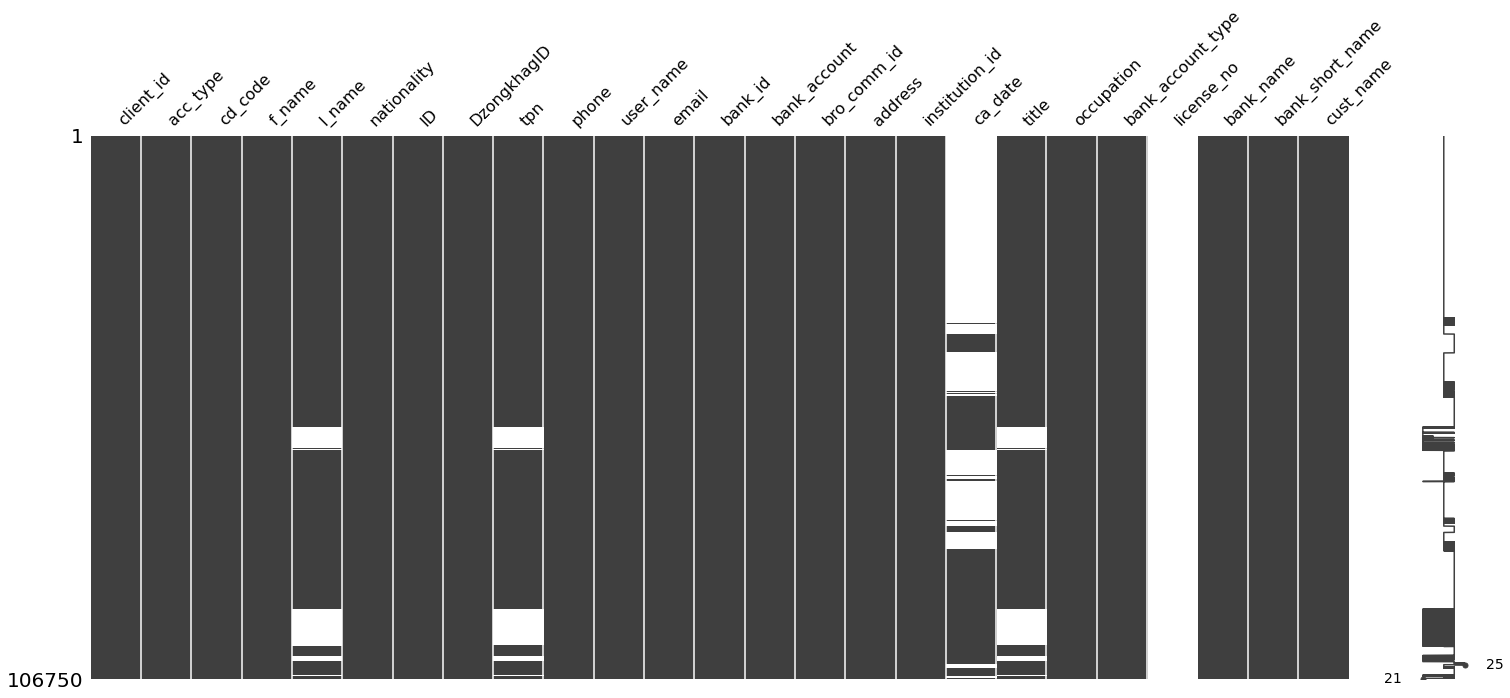

In [8]:
import missingno as msn

msn.matrix(data)
plt.show()

In [9]:
cols = ['client_id', 'acc_type', 'cd_code', 'cust_name', 'nationality','ID', 'DzongkhagID', 'tpn', 
        'phone', 'user_name', 'email', 'bank_id','bank_account', 'address',
        'title', 'occupation', 'bank_account_type', 'bank_name','bank_short_name']
data_test = data_test[cols]
data_test

,client_id,acc_type,cd_code,cust_name,nationality,ID,DzongkhagID,tpn,phone,user_name,email,bank_id,bank_account,address,title,occupation,bank_account_type,bank_name,bank_short_name
0,4,J,1000000001,ASTROLOGER INSTITUTE,BHUTANESE,RI0000001,1308,,,EMPRSEB001,,1,,DECHENCHOLING,,101,Saving Account,BHUTAN NATIONAL BANK LIMITED,BNBL
1,5,J,1000000002,AUTHSO NAMDRELCHHOLING DRATSHANG,,RI0000002,1308,,,EMPRSEB001,,1,,AUTHSO NAMDRELCHHOLING DRATSHANG LHUNTSE,,101,\r,BHUTAN NATIONAL BANK LIMITED,BNBL
2,6,J,1000000003,BHUTAN TEMPLE BUDHA GAYA,,RI0000003,1308,,,EMPRSEB001,,1,,DY. SECRETARY COUNCIL FOR ECCLESIATICAL AFFAI...,,101,\r,BHUTAN NATIONAL BANK LIMITED,BNBL
3,7,J,1000000004,BULI GOMDEY,BHUTANESE,RI0000004,1308,,,EMPRSEB001,,1,5000044274018,C/O. PRINCIPAL BULI GOMDEY CHUMEY BUMTHANG,,101,Saving Account,BHUTAN NATIONAL BANK LIMITED,BNBL
4,23,J,1000000020,CHERI DUBDEY NANGMA,,RI0000006,1308,,,EMPRSEB001,,1,,C/O THE SECRETARY THE CENTRAL MONASTIC BODY ...,,101,\r,BHUTAN NATIONAL BANK LIMITED,BNBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106745,110511,I,LO76417657,Lok Bdr Ghalley,Bhutanese,11301002764,1308,None,17681997,CC00071,,5,77277016360001,,None,101,Saving Account,T BANK LIMITED,TBANK
106746,110736,I,TA70677400,Tashi Dorji,Bhutanese,11302001706,1308,None,77213028,CC00110,,5,77277036293001,,None,101,Saving Account,T BANK LIMITED,TBANK
106747,110763,I,TH71277853,Thinley Penjor,Bhutanese,11302001712,1308,None,77776306,CC00110,,5,77277033455001,,None,101,Saving Account,T BANK LIMITED,TBANK
106748,111085,I,LDSB000575,LHACHO DEMA,BHUTANESE,10607000951,1321,,77125533,MEMLDSB003,lhachodema20@gmail.com,5,77777046358001,"Babesa, Thimphu",MRS,101,Saving Account,T BANK LIMITED,TBANK


In [10]:
data_test.dtypes

client_id             int64
acc_type             object
cd_code              object
cust_name            object
nationality          object
ID                   object
DzongkhagID           int64
tpn                  object
phone                object
user_name            object
email                object
bank_id               int64
bank_account         object
address              object
title                object
occupation           object
bank_account_type    object
bank_name            object
bank_short_name      object
dtype: object

In [11]:
#count of blanks in bank account
(data_test['bank_account'].values == '').sum()

46455

In [12]:
#length column to count bank_account digits
data_test['length'] = data_test['bank_account'].str.count('\d')

C:\Users\Asus\AppData\Local\Temp/ipykernel_6216/4073878638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['length'] = data_test['bank_account'].str.count('\d')


In [13]:
data_test

,client_id,acc_type,cd_code,cust_name,nationality,ID,DzongkhagID,tpn,phone,user_name,email,bank_id,bank_account,address,title,occupation,bank_account_type,bank_name,bank_short_name,length
0,4,J,1000000001,ASTROLOGER INSTITUTE,BHUTANESE,RI0000001,1308,,,EMPRSEB001,,1,,DECHENCHOLING,,101,Saving Account,BHUTAN NATIONAL BANK LIMITED,BNBL,0
1,5,J,1000000002,AUTHSO NAMDRELCHHOLING DRATSHANG,,RI0000002,1308,,,EMPRSEB001,,1,,AUTHSO NAMDRELCHHOLING DRATSHANG LHUNTSE,,101,\r,BHUTAN NATIONAL BANK LIMITED,BNBL,0
2,6,J,1000000003,BHUTAN TEMPLE BUDHA GAYA,,RI0000003,1308,,,EMPRSEB001,,1,,DY. SECRETARY COUNCIL FOR ECCLESIATICAL AFFAI...,,101,\r,BHUTAN NATIONAL BANK LIMITED,BNBL,0
3,7,J,1000000004,BULI GOMDEY,BHUTANESE,RI0000004,1308,,,EMPRSEB001,,1,5000044274018,C/O. PRINCIPAL BULI GOMDEY CHUMEY BUMTHANG,,101,Saving Account,BHUTAN NATIONAL BANK LIMITED,BNBL,13
4,23,J,1000000020,CHERI DUBDEY NANGMA,,RI0000006,1308,,,EMPRSEB001,,1,,C/O THE SECRETARY THE CENTRAL MONASTIC BODY ...,,101,\r,BHUTAN NATIONAL BANK LIMITED,BNBL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106745,110511,I,LO76417657,Lok Bdr Ghalley,Bhutanese,11301002764,1308,None,17681997,CC00071,,5,77277016360001,,None,101,Saving Account,T BANK LIMITED,TBANK,14
106746,110736,I,TA70677400,Tashi Dorji,Bhutanese,11302001706,1308,None,77213028,CC00110,,5,77277036293001,,None,101,Saving Account,T BANK LIMITED,TBANK,14
106747,110763,I,TH71277853,Thinley Penjor,Bhutanese,11302001712,1308,None,77776306,CC00110,,5,77277033455001,,None,101,Saving Account,T BANK LIMITED,TBANK,14
106748,111085,I,LDSB000575,LHACHO DEMA,BHUTANESE,10607000951,1321,,77125533,MEMLDSB003,lhachodema20@gmail.com,5,77777046358001,"Babesa, Thimphu",MRS,101,Saving Account,T BANK LIMITED,TBANK,14


In [14]:
data_test['length'].value_counts()

0     46456
9     35405
13    10797
12     9857
17     2582
14      683
10      413
8       243
11      159
16       45
3        24
5        20
1        12
18       10
2        10
7        10
4         9
15        6
6         5
22        2
19        1
21        1
Name: length, dtype: int64

In [32]:
conditions = [
    data_test['length'] == 9,
    data_test['length'] == 13,
    data_test['length'] == 14
]

outputs = ['BOBL','BNBL','TBANK']

In [33]:
data_test['short_bank']= np.select(conditions, outputs, 'INVALID')
#pd.Series(data_test['Bank_name'])

C:\Users\Asus\AppData\Local\Temp/ipykernel_6216/2157271643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['short_bank']= np.select(conditions, outputs, 'INVALID')


In [38]:
data_test.loc[(data_test['length'] == 12) & (data_test['bank_account'].str.startswith('11')), 'short_bank'] = 'DPNB'
data_test.loc[(data_test['length'] == 12) & (data_test['bank_account'].str.startswith('00')), 'short_bank'] = 'BDBL'
data_test.loc[(data_test['length'] == 0) | (data_test['length']<9) |(data_test['length']>14), 'short_bank'] = 'INVALID'

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [39]:
data_test

,client_id,acc_type,cd_code,cust_name,nationality,ID,DzongkhagID,tpn,phone,user_name,...,bank_id,bank_account,address,title,occupation,bank_account_type,bank_name,bank_short_name,length,short_bank
0,4,J,1000000001,ASTROLOGER INSTITUTE,BHUTANESE,RI0000001,1308,,,EMPRSEB001,...,1,,DECHENCHOLING,,101,Saving Account,BHUTAN NATIONAL BANK LIMITED,BNBL,0,INVALID
1,5,J,1000000002,AUTHSO NAMDRELCHHOLING DRATSHANG,,RI0000002,1308,,,EMPRSEB001,...,1,,AUTHSO NAMDRELCHHOLING DRATSHANG LHUNTSE,,101,\r,BHUTAN NATIONAL BANK LIMITED,BNBL,0,INVALID
2,6,J,1000000003,BHUTAN TEMPLE BUDHA GAYA,,RI0000003,1308,,,EMPRSEB001,...,1,,DY. SECRETARY COUNCIL FOR ECCLESIATICAL AFFAI...,,101,\r,BHUTAN NATIONAL BANK LIMITED,BNBL,0,INVALID
3,7,J,1000000004,BULI GOMDEY,BHUTANESE,RI0000004,1308,,,EMPRSEB001,...,1,5000044274018,C/O. PRINCIPAL BULI GOMDEY CHUMEY BUMTHANG,,101,Saving Account,BHUTAN NATIONAL BANK LIMITED,BNBL,13,BNBL
4,23,J,1000000020,CHERI DUBDEY NANGMA,,RI0000006,1308,,,EMPRSEB001,...,1,,C/O THE SECRETARY THE CENTRAL MONASTIC BODY ...,,101,\r,BHUTAN NATIONAL BANK LIMITED,BNBL,0,INVALID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106745,110511,I,LO76417657,Lok Bdr Ghalley,Bhutanese,11301002764,1308,None,17681997,CC00071,...,5,77277016360001,,None,101,Saving Account,T BANK LIMITED,TBANK,14,TBANK
106746,110736,I,TA70677400,Tashi Dorji,Bhutanese,11302001706,1308,None,77213028,CC00110,...,5,77277036293001,,None,101,Saving Account,T BANK LIMITED,TBANK,14,TBANK
106747,110763,I,TH71277853,Thinley Penjor,Bhutanese,11302001712,1308,None,77776306,CC00110,...,5,77277033455001,,None,101,Saving Account,T BANK LIMITED,TBANK,14,TBANK
106748,111085,I,LDSB000575,LHACHO DEMA,BHUTANESE,10607000951,1321,,77125533,MEMLDSB003,...,5,77777046358001,"Babesa, Thimphu",MRS,101,Saving Account,T BANK LIMITED,TBANK,14,TBANK


In [40]:
data_test['short_bank'].value_counts()

INVALID    53442
BOBL       35405
BNBL       10797
DPNB        3995
BDBL        2428
TBANK        683
Name: short_bank, dtype: int64

In [42]:
data_test[data_test['bank_short_name'] == 'DPNB']

,client_id,acc_type,cd_code,cust_name,nationality,ID,DzongkhagID,tpn,phone,user_name,...,bank_id,bank_account,address,title,occupation,bank_account_type,bank_name,bank_short_name,length,short_bank
61906,8,J,1000000005,CENTRAL MONASTIC BODY,,RI0000005,1308,,,EMPRSEB001,...,4,110010161270,TASHI CHHODZONG THIMPHU : BHUTAN,,101,\r,DRUK PNB BANK LIMITED,DPNB,12,DPNB
61907,9,J,1000000006,CENTRAL MONASTIC BODY,,RI0000005,1308,,,EMPRSEB001,...,4,110010161270,C/O THE SECRETARY THE CENTRAL MONASTIC BODY ...,,101,\r,DRUK PNB BANK LIMITED,DPNB,12,DPNB
61908,10,J,1000000007,CENTRAL MONASTIC BODY,,RI0000005,1308,,,EMPRSEB001,...,4,110010161270,THIMPHU,,101,\r,DRUK PNB BANK LIMITED,DPNB,12,DPNB
61909,11,J,1000000008,CENTRAL MONK BODY,,RI0000005,1308,,,EMPRSEB001,...,4,110010161270,TASHICHHODZONG THIMPHU,,101,\r,DRUK PNB BANK LIMITED,DPNB,12,DPNB
61910,12,J,1000000009,CENTRAL MONK BODY,,RI0000005,1308,,,EMPRSEB001,...,4,110010161270,TASHI CHHO DZONG THIMPHU,,101,\r,DRUK PNB BANK LIMITED,DPNB,12,DPNB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67905,111050,I,SER0000121,SHARAN PRADHAN,BHUTANESE,11213003045,1319,SAP43781,17745812,MEMSERS001,...,4,220010017214,Jasmin Construction,MR,2,Saving Account,DRUK PNB BANK LIMITED,DPNB,12,INVALID
67906,111098,I,R202112348,SANG TSHERING LEPCHA,BHUTANESE,11213000285,1319,,77263141,MEMRICB002,...,4,110010568321,"THIMPHU,BHUTAN",MR,25,Saving Account,DRUK PNB BANK LIMITED,DPNB,12,DPNB
67907,111419,I,DSB0000690,LEKI CHODEN,BHUTANESE,11312002968,1308,,17791895,MEMDSBP001,...,4,110010343953,"KALA BAZAR, THIMPHU",MRS,101,Saving Account,DRUK PNB BANK LIMITED,DPNB,12,DPNB
67908,111448,I,R202206554,DORJI WANGMO,BHUTANESE,11906000097,1319,,77638726,MEMRICB021,...,4,330010075153,thimphu,MR.,25,Saving Account,DRUK PNB BANK LIMITED,DPNB,12,INVALID


In [45]:
data_test['short_bank'].unique()

array(['INVALID', 'BNBL', 'BOBL', 'TBANK', 'DPNB', 'BDBL'], dtype=object)

In [46]:
bank_count = data_test['short_bank'].value_counts()
bank_count

INVALID    53442
BOBL       35405
BNBL       10797
DPNB        3995
BDBL        2428
TBANK        683
Name: short_bank, dtype: int64

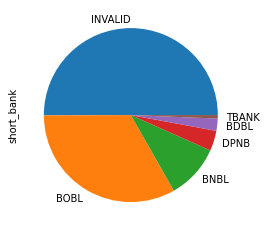

In [47]:
bank_count.plot(kind='pie')
plt.show()

In [48]:
labels = data_test['short_bank'].value_counts().index.tolist()
display(labels)

sizes = []
for idx,name in enumerate (data_test['short_bank'].value_counts().index.tolist()):
    siz = data_test['short_bank'].value_counts()[idx]
    sizes.append(siz)
    
display(sizes)

['INVALID', 'BOBL', 'BNBL', 'DPNB', 'BDBL', 'TBANK']

[53442, 35405, 10797, 3995, 2428, 683]

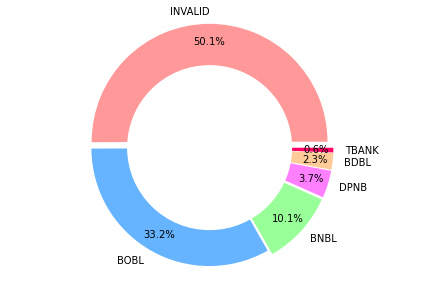

<Figure size 432x288 with 0 Axes>

In [79]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ff80ff','#ffcc99','#ff0066']
#explsion
explode = (0.05,0.005,0.05,0.05,0.05,0.05)

fig, ax1 = plt.subplots()

plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=360, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()
plt.savefig('firstVis.jpg')